In [1]:
import random
import pandas as pd

# Sample of French train stations and cities to use in generating questions
stations = [
    "Lyon", "Paris", "Marseille", "Bordeaux", "Nantes", "Toulouse",
    "Strasbourg", "Lille", "Nice", "Montpellier", "Rennes", "Grenoble",
    "Tours", "Le Mans", "Dijon", "Brest", "Rouen", "Caen", "Amiens",
    "Nancy", "Metz", "Orléans", "Limoges", "Reims", "Angers",
    "Clermont-Ferrand", "Saint-Étienne", "Toulon", "Le Havre", "Avignon",
    "Perpignan", "Besançon", "Mulhouse", "Roubaix", "Tourcoing", "Nîmes",
    "Villeurbanne", "Saint-Denis", "Argenteuil", "Montreuil", "Rouen",
    "Boulogne-Billancourt", "Nancy", "Saint-Denis", "Roubaix", "Tourcoing",
    "Nanterre", "Vitry-sur-Seine", "Créteil", "Dunkerque", "Aubervilliers",
    "Bezier", "Bourges", "Carcassonne", "Chambéry", "Colmar", "La Rochelle",
    "La Seyne-sur-Mer", "Le Tampon", "Pau", "Saint-Maur-des-Fossés",
    "Saint-Nazaire", "Sarcelles", "Tarbes", "Vénissieux", "Ajaccio",
    "Albi", "Angoulême", "Annecy", "Arras", "Aulnay-sous-Bois", "Bastia",
    "Bayonne", "Beauvais", "Belfort", "Bobigny", "Bondy", "Brive-la-Gaillarde",
    "Cagnes-sur-Mer", "Calais", "Cannes", "Castres", "Chalon-sur-Saône",
    "Charleville-Mézières", "Cholet", "Clamart", "Clichy", "Cognac",
    "Colombes", "Compiègne", "Creil", "Douai", "Draguignan", "Drancy",
    "Échirolles", "Épinal", "Évreux", "Fontenay-sous-Bois", "Fréjus",
    "Garges-lès-Gonesse", "Gennevilliers", "Gonesse", "Grasse", "Haguenau",
    "Issy-les-Moulineaux", "Joué-lès-Tours", "La Ciotat", "Le Cannet",
    "Le Perreux-sur-Marne", "Lens", "Liévin", "Lorient", "Maubeuge",
    "Meaux", "Melun", "Montauban", "Montluçon", "Montélimar", "Montigny-le-Bretonneux",
    "Nevers", "Noisy-le-Grand", "Pant", "Pessac", "Poissy", "Pontault-Combault",
    "Pontoise", "Quimper", "Rambouillet", "Roanne", "Romans-sur-Isère",
    "Saint-Brieuc", "Saint-Chamond", "Saint-Germain-en-Laye", "Saint-Laurent-du-Var",
]

# Templates for generating new questions
templates = [
    "Je veux aller de {start} à {end}",
    "Comment puis-je me rendre à {end} depuis {start} ?",
    "Y a-t-il des trains entre {start} et {end} ?",
    "Je souhaite me rendre à {end} en partant de {start}.",
    "Quels sont les horaires des trains de {start} à {end} ?",
    "Est-ce qu'il y a un train direct entre {start} et {end} ?",
    "Je dois aller à {end} depuis {start}, comment faire ?",
    "Puis-je prendre un train de {start} à {end} ?",
    "Quels trains vont de {start} à {end} ?",
    "Je veux voyager de {start} à {end}.",
    "Quel est le meilleur itinéraire de {start} à {end} ?",
    "Combien de temps faut-il pour aller de {start} à {end} ?",
    "Quels sont les arrêts entre {start} et {end} ?",
    "Y a-t-il des réductions pour les billets de {start} à {end} ?",
    "Quels sont les prix des billets de {start} à {end} ?",
    "Quels sont les trains les plus rapides de {start} à {end} ?",
    "Quels sont les trains les moins chers de {start} à {end} ?",
    "Y a-t-il des trains de nuit entre {start} et {end} ?",
    "Quels sont les services disponibles à bord des trains de {start} à {end} ?",
    "Puis-je réserver un billet de {start} à {end} en ligne ?",
    "Quels sont les horaires des premiers et derniers trains de {start} à {end} ?",
    "Y a-t-il des correspondances entre {start} et {end} ?",
    "Quels sont les trains directs de {start} à {end} ?",
    "Quels sont les trains avec correspondance de {start} à {end} ?",
    "Je veux aller de {start} vers {end}.",
    "Quels sont les trains qui partent de {start} à destination de {end} ?",
    "Je veux voyager de {start} vers {end}.",
    "Je veux prendre un train de {start} à {end}.",
    "Je veux prendre un train de {start} vers {end}.",
    "Je voudrai aller a {end}.",
    "Je voudrai partir de {start} pour aller a {end}.",
    "Je voudrai partir de {start}.",
    "Je voudrai prendre un train en direction de {end}.",
    "Je voudrai prendre un train en direction de {end} depuis {start}.",

]

# Generate a list of new questions
def generate_questions(num_questions=2000):
    questions = []
    for _ in range(num_questions):
        start = random.choice(stations)
        end = random.choice(stations)
        if start != end:  # Ensure start and end are not the same
            template = random.choice(templates)
            question = template.format(start=start, end=end)
            questions.append((question, start, end))
    return questions

# Generate new questions
new_questions = generate_questions(100000)

# Read the questions into a DataFrame
df = pd.DataFrame(new_questions, columns=['question', 'start', 'end'])

# Function to convert questions to NER format
def convert_to_ner_format(row):
    tokens = row['question'].split()
    ner_format = []
    start_tokens = row['start'].split()
    end_tokens = row['end'].split()

    i = 0
    while i < len(tokens):
        token = tokens[i]
        if token in start_tokens:
            for j, start_token in enumerate(start_tokens):
                label = 'B-START' if j == 0 else 'I-START'
                ner_format.append((start_token, label))
                i += 1
        elif token in end_tokens:
            for j, end_token in enumerate(end_tokens):
                label = 'B-END' if j == 0 else 'I-END'
                ner_format.append((end_token, label))
                i += 1
        else:
            ner_format.append((token, 'O'))
            i += 1

    return ner_format

# Apply the conversion to the entire dataframe
ner_data = df.apply(convert_to_ner_format, axis=1)

# Flatten the list of tuples and create a new DataFrame
flattened_ner_data = [item for sublist in ner_data for item in sublist]
ner_df = pd.DataFrame(flattened_ner_data, columns=['token', 'label'])

# Add sentence_id column
ner_df['sentence_id'] = (ner_df['token'] == '?').cumsum()

# Define the label mapping
label_mapping = {"O": 0, "B-START": 1, "I-START": 2, "B-END": 3, "I-END": 4}

# Add ner_tag column with numerical labels
ner_df['ner_tag'] = ner_df['label'].map(label_mapping)

# Save the NER formatted data to a CSV file
ner_df.to_csv('ner_training_data2.csv', index=False)

# Display the first 10 rows of the NER formatted data
print(ner_df.head(10))

     token    label  sentence_id  ner_tag
0    Quels        O            0        0
1     sont        O            0        0
2      les        O            0        0
3     prix        O            0        0
4      des        O            0        0
5  billets        O            0        0
6       de        O            0        0
7    Bondy  B-START            0        1
8        à        O            0        0
9       Le    B-END            0        3


In [1]:
!pip install datasets
!pip install seqeval

  Using cached seqeval-1.2.2.tar.gz (43 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=ca5820a1d9b034f2bbe7ffaad6c4656177a2f49beac69698dae1b0ac721f7421
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [5]:
import pandas as pd
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer
from transformers import DataCollatorForTokenClassification
from seqeval.metrics import classification_report
from transformers import EarlyStoppingCallback

# Load the data
df = pd.read_csv('/content/ner_training_data2.csv')

# Convert the data into the format required by the Hugging Face datasets library
def convert_to_hf_format(df):
    tokens = []
    labels = []
    current_tokens = []
    current_labels = []

    for _, row in df.iterrows():
        if row['token'] == '?':  # Assuming '?' indicates the end of a sentence
            current_tokens.append(row['token'])
            current_labels.append(row['ner_tag'])
            tokens.append(current_tokens)
            labels.append(current_labels)
            current_tokens = []
            current_labels = []
        else:
            current_tokens.append(row['token'])
            current_labels.append(row['ner_tag'])

    if current_tokens:
        tokens.append(current_tokens)
        labels.append(current_labels)

    return tokens, labels

tokens, labels = convert_to_hf_format(df)

# Debug prints to check the data
print(f"Number of samples: {len(tokens)}")
print(f"First sample tokens: {tokens[0] if tokens else 'No tokens'}")
print(f"First sample labels: {labels[0] if labels else 'No labels'}")

# Create a Hugging Face dataset
dataset = Dataset.from_dict({"tokens": tokens, "ner_tags": labels})

# Check the dataset
print(dataset)

# Split the dataset into train and test sets
if len(tokens) > 1:
    dataset = dataset.train_test_split(test_size=0.2)
else:
    raise ValueError("Not enough samples to split into train and test sets.")

# Define the label list
label_list = ["O", "B-START", "I-START", "B-END", "I-END"]

# Load the tokenizer and model
model_name = "cmarkea/distilcamembert-base-ner"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name, num_labels=len(label_list))

# Tokenize the dataset
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
    labels = []
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_datasets = dataset.map(tokenize_and_align_labels, batched=True)

# Define the data collator
data_collator = DataCollatorForTokenClassification(tokenizer)

# Define the training arguments with weight decay and early stopping
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",  # Ensure save strategy matches evaluation strategy
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
)

# Define the trainer
def compute_metrics(p):
    predictions, labels = p
    predictions = predictions.argmax(axis=-1)
    true_labels = [[label_list[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    return classification_report(true_labels, true_predictions, output_dict=True)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

# Train the model
trainer.train()

# Save the model
model.save_pretrained("./ner_model")
tokenizer.save_pretrained("./ner_model")

Number of samples: 63969
First sample tokens: ['Quels', 'sont', 'les', 'prix', 'des', 'billets', 'de', 'Bondy', 'à', 'Le', 'Tampon', '?']
First sample labels: [0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 4, 0]
Dataset({
    features: ['tokens', 'ner_tags'],
    num_rows: 63969
})


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/51175 [00:00<?, ? examples/s]

Map:   0%|          | 0/12794 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,End,Start,Micro avg,Macro avg,Weighted avg
1,0.000500,0.000365,"{'precision': 0.9993921383223018, 'recall': 0.9993921383223018, 'f1-score': 0.9993921383223018, 'support': 14806}","{'precision': 0.999393608635013, 'recall': 0.9997573551713679, 'f1-score': 0.9995754488112567, 'support': 16485}","{'precision': 0.9993929130587597, 'recall': 0.9995845450768591, 'f1-score': 0.9994887198824056, 'support': 31291}","{'precision': 0.9993928734786575, 'recall': 0.9995747467468348, 'f1-score': 0.9994837935667793, 'support': 31291}","{'precision': 0.9993929129253839, 'recall': 0.9995845450768591, 'f1-score': 0.9994887115673379, 'support': 31291}"
2,0.000300,0.000123,"{'precision': 0.9997974204875414, 'recall': 1.0, 'f1-score': 0.9998986999831168, 'support': 14806}","{'precision': 0.9999393314323849, 'recall': 0.999818016378526, 'f1-score': 0.9998786702256734, 'support': 16485}","{'precision': 0.9998721718010993, 'recall': 0.9999041257869675, 'f1-score': 0.9998881485387406, 'support': 31291}","{'precision': 0.9998683759599631, 'recall': 0.999909008189263, 'f1-score': 0.9998886851043951, 'support': 31291}","{'precision': 0.9998721832604072, 'recall': 0.9999041257869675, 'f1-score': 0.9998881477300264, 'support': 31291}"
3,0.000200,0.000150,"{'precision': 0.9997974204875414, 'recall': 1.0, 'f1-score': 0.9998986999831168, 'support': 14806}","{'precision': 0.9999393314323849, 'recall': 0.999818016378526, 'f1-score': 0.9998786702256734, 'support': 16485}","{'precision': 0.9998721718010993, 'recall': 0.9999041257869675, 'f1-score': 0.9998881485387406, 'support': 31291}","{'precision': 0.9998683759599631, 'recall': 0.999909008189263, 'f1-score': 0.9998886851043951, 'support': 31291}","{'precision': 0.9998721832604072, 'recall': 0.9999041257869675, 'f1-score': 0.9998881477300264, 'support': 31291}"


Trainer is attempting to log a value of "{'precision': 0.9993921383223018, 'recall': 0.9993921383223018, 'f1-score': 0.9993921383223018, 'support': 14806}" of type <class 'dict'> for key "eval/END" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.999393608635013, 'recall': 0.9997573551713679, 'f1-score': 0.9995754488112567, 'support': 16485}" of type <class 'dict'> for key "eval/START" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9993929130587597, 'recall': 0.9995845450768591, 'f1-score': 0.9994887198824056, 'support': 31291}" of type <class 'dict'> for key "eval/micro avg" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.999392873478657

Trainer is attempting to log a value of "{'precision': 0.9997974204875414, 'recall': 1.0, 'f1-score': 0.9998986999831168, 'support': 14806}" of type <class 'dict'> for key "eval/END" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9999393314323849, 'recall': 0.999818016378526, 'f1-score': 0.9998786702256734, 'support': 16485}" of type <class 'dict'> for key "eval/START" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9998721718010993, 'recall': 0.9999041257869675, 'f1-score': 0.9998881485387406, 'support': 31291}" of type <class 'dict'> for key "eval/micro avg" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9998683759599631, 'recall': 0.

TypeError: list indices must be integers or slices, not str

Trainer is attempting to log a value of "{'precision': 0.9997974204875414, 'recall': 1.0, 'f1-score': 0.9998986999831168, 'support': 14806}" of type <class 'dict'> for key "eval/END" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9999393314323849, 'recall': 0.999818016378526, 'f1-score': 0.9998786702256734, 'support': 16485}" of type <class 'dict'> for key "eval/START" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9998721718010993, 'recall': 0.9999041257869675, 'f1-score': 0.9998881485387406, 'support': 31291}" of type <class 'dict'> for key "eval/micro avg" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9998683759599631, 'recall': 0.

{'eval_loss': 0.00012300819798838347, 'eval_END': {'precision': 0.9997974204875414, 'recall': 1.0, 'f1-score': 0.9998986999831168, 'support': 14806}, 'eval_START': {'precision': 0.9999393314323849, 'recall': 0.999818016378526, 'f1-score': 0.9998786702256734, 'support': 16485}, 'eval_micro avg': {'precision': 0.9998721718010993, 'recall': 0.9999041257869675, 'f1-score': 0.9998881485387406, 'support': 31291}, 'eval_macro avg': {'precision': 0.9998683759599631, 'recall': 0.999909008189263, 'f1-score': 0.9998886851043951, 'support': 31291}, 'eval_weighted avg': {'precision': 0.9998721832604072, 'recall': 0.9999041257869675, 'f1-score': 0.9998881477300264, 'support': 31291}, 'eval_runtime': 25.6622, 'eval_samples_per_second': 498.555, 'eval_steps_per_second': 31.174, 'epoch': 3.0}


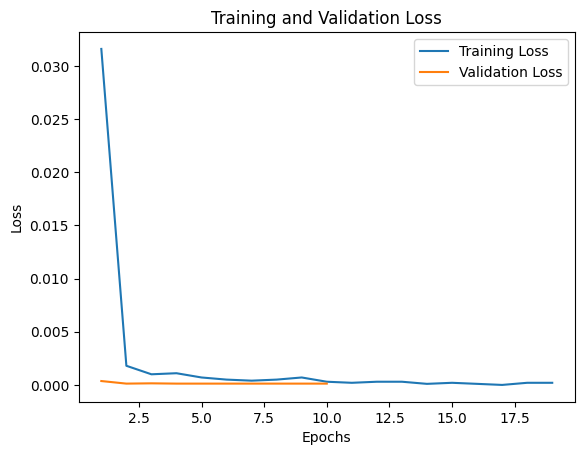

In [17]:
# Evaluate the model with test data
eval_results = trainer.evaluate(tokenized_datasets["test"])

# Access the training and validation loss from the log history
training_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
validation_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]

# Ensure that epochs correspond to the length of the losses
epochs = range(1, len(training_loss) + 1)

# Print the evaluation results
print(eval_results)

# Create the plot
plt.plot(epochs, training_loss, label='Training Loss')

epochs = range(1, len(validation_loss) + 1)
plt.plot(epochs, validation_loss, label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Add a legend
plt.legend()

# Show the plot
plt.show()